# Statistics

In this notebook, we will look at a few statistical properties to get a feel for howto work with statistical samples - and also, how to avoid some pitfalls.

In a first step, we look at descriptive statistics. 
This allows us to characterise a range of data points.
We typically look at quantities such as the mean (or median) of the sample, the sample variance, or others.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd 



## Descriptive Statistics

### Anscombe's Quartet

This is a famous example first described in: Anscombe, F. J. (1973). "Graphs in Statistical Analysis". American Statistician. 27 (1): 17–21.

It allows us to compare the descriptive statistics of 4 different statistical samples - and also determine how we can get fooled by looking at just these numbers without further investigation.
The data can be obtained, for example, from [Wikipedia](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)

In [2]:
# define dataset
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

datasets = {
    'I': (x, y1),
    'II': (x, y2),
    'III': (x, y3),
    'IV': (x4, y4)
}

First we calculate the standard mean and variance of each sample.

In [3]:
for label, (x,y) in datasets.items():
  print('Dataset {}: \t{}'.format(label, y))
  print('Mean {0:.2f}, std. deviation {1:.2f}'.format(np.mean(y), np.std(y)))
  print('')

Dataset I: 	[8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
Mean 7.50, std. deviation 1.94

Dataset II: 	[9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74]
Mean 7.50, std. deviation 1.94

Dataset III: 	[7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
Mean 7.50, std. deviation 1.94

Dataset IV: 	[6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]
Mean 7.50, std. deviation 1.94



Here, we immediately notice that the descriptive statistics is identical for each dataset (both mean and standard deviation), even though we can see that the numbers are all different.
In this example, we only have a handful of numbers so we can look at each of them. Quite often, we have a lot more and need to look further.

This is why it's important to not just rely on descriptive statistics in the form of numbers like mean and standard deviation - but also plot the data.

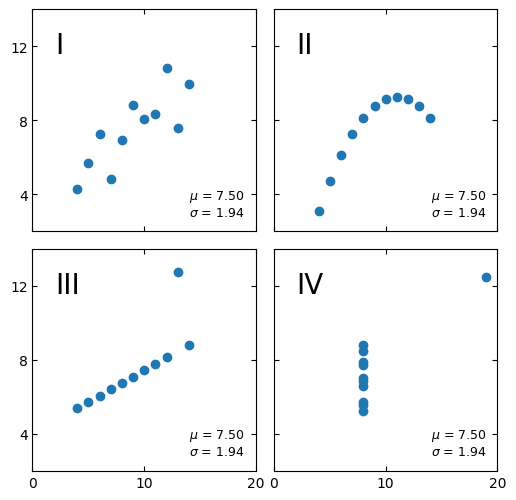

In [4]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(6, 6),
                        gridspec_kw={'wspace': 0.08, 'hspace': 0.08})
axs[0, 0].set(xlim=(0, 20), ylim=(2, 14))
axs[0, 0].set(xticks=(0, 10, 20), yticks=(4, 8, 12))

for ax, (label, (x, y)) in zip(axs.flat, datasets.items()):
    ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va='top')
    ax.tick_params(direction='in', top=True, right=True)
    ax.plot(x, y, 'o')

    # add text box for the statistics
    stats = (f'$\\mu$ = {np.mean(y):.2f}\n'
             f'$\\sigma$ = {np.std(y):.2f}')
    ax.text(0.95, 0.07, stats, fontsize=9, 
            transform=ax.transAxes, horizontalalignment='right')
    
plt.show()

Here we can see that all descriptive numbers are the same - but the data are very different.

This can be taken one step further which is what researchers at Autodesk have done. They have created the [Datasaurus Dozen](https://www.autodesk.com/research/publications/same-stats-different-graphs).
These are a dozen different ways of arranging datapoints such that they always have the same mean, standard deviation/variance, etc.

They start off with a fun image of a dinosaur.

In [6]:
df = pd.read_csv('data/datasaurusdozen/DatasaurusDozen.tsv', sep='\t')

In [7]:
dino=df[df['dataset']=='dino']
dino.head(5)

,dataset,x,y
0,dino,55.3846,97.1795
1,dino,51.5385,96.0256
2,dino,46.1538,94.4872
3,dino,42.8205,91.4103
4,dino,40.7692,88.3333


In [8]:
print(' mean(x) {0:.2f}, std. deviation(x) {1:.2f}, \n mean(y) {2:.2f}, std. deviation(y) {3:.2f}'.format(np.mean(dino['x']), np.std(dino['x']), 
                                                                                                        np.mean(dino['y']), np.std(dino['y'])))

 mean(x) 54.26, std. deviation(x) 16.71, 
 mean(y) 47.83, std. deviation(y) 26.84


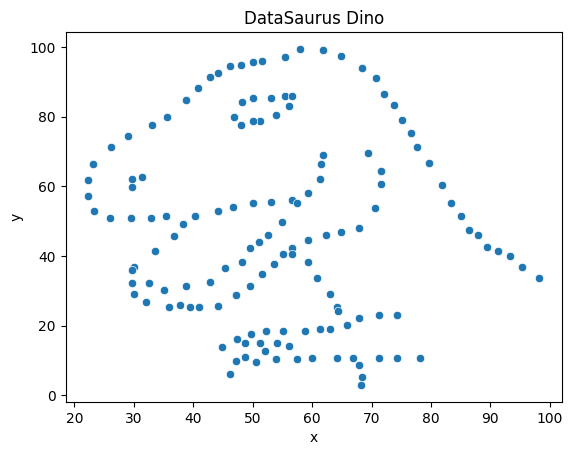

In [9]:
sns.scatterplot(data=dino, x='x', y='y')
plt.title('DataSaurus Dino')
plt.show()

... and now all the others...

As we can see, each graph, from the dino to the star, has the same descriptive statistics - but vastly different properties which becomes immediately obvious once we look at the distribution of the data



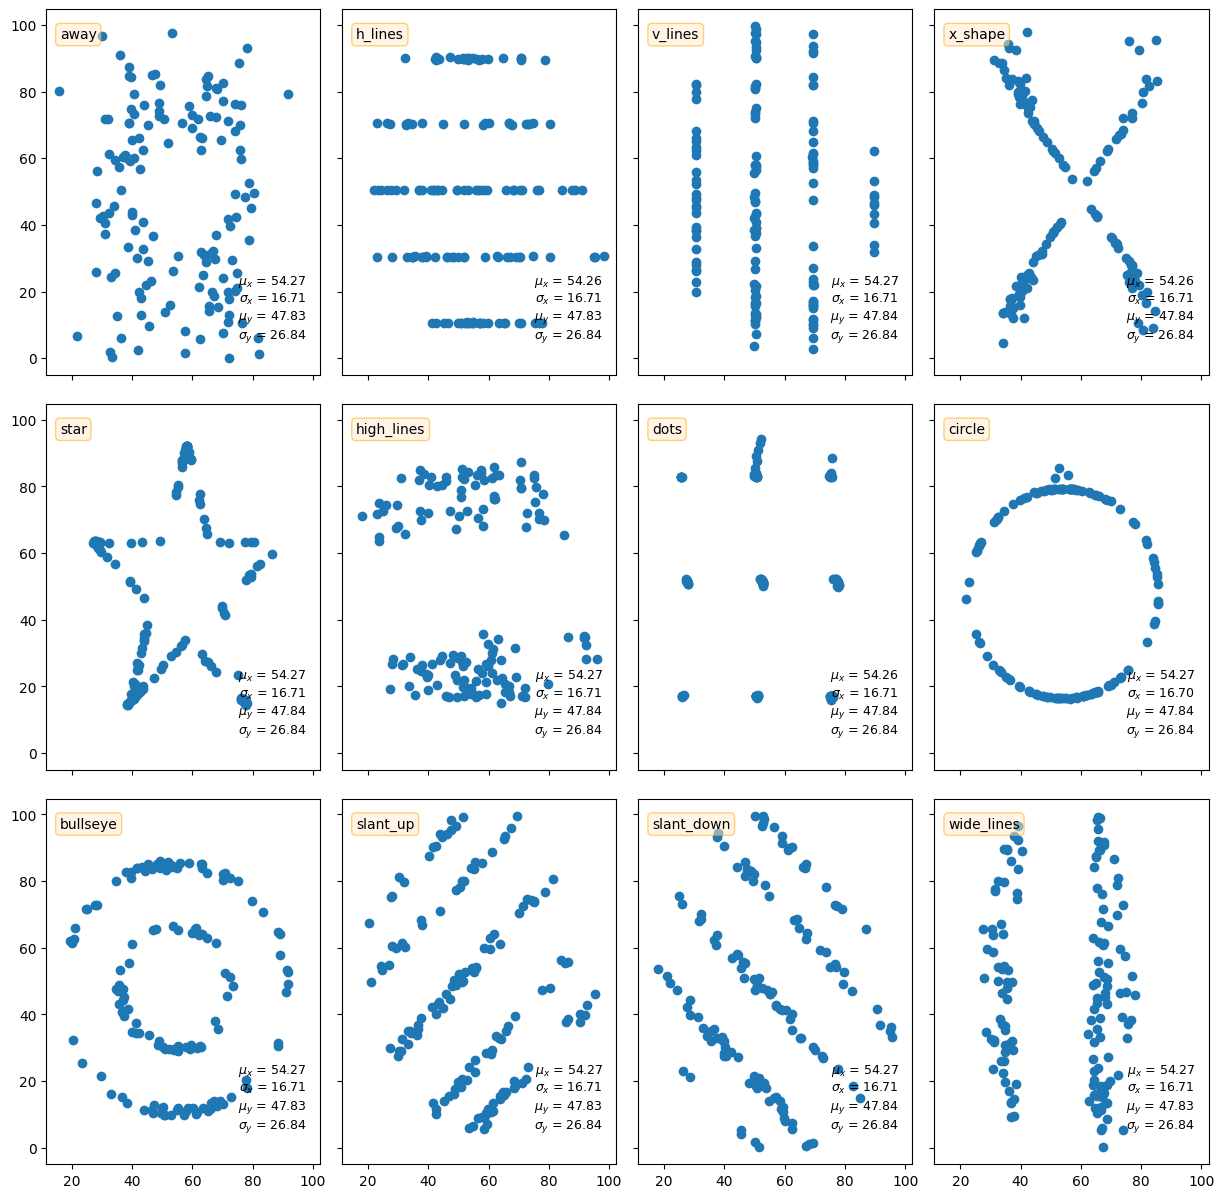

In [10]:
dozen=df.copy()
dozen = dozen[dozen['dataset'] != 'dino']
names = dozen['dataset'].unique()
fig, axs = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(15, 15),
                        gridspec_kw={'wspace': 0.08, 'hspace': 0.08})


for ax,name in zip(axs.flat, names):
  # create a little box around the name  of the dataset
  bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
  # add the name of the dataset to the figure rather than a title.
  ax.text(0.05, 0.95, name, fontsize=10, 
          transform=ax.transAxes,  bbox=bbox, va='top')

  # the actual scatterplot
  x = dozen[dozen['dataset']==name]['x']
  y = dozen[dozen['dataset']==name]['y']
  ax.scatter(x,y)
  
  # add text box for the descriptive statistics
  stats = (
      f'$\\mu_x$ = {np.mean(x):.2f}\n'
      f'$\\sigma_x$ = {np.std(x):.2f}\n'
      f'$\\mu_y$ = {np.mean(y):.2f}\n'
      f'$\\sigma_y$ = {np.std(y):.2f}\n'
           )
  # write the text into the figure
  ax.text(0.95, 0.05, stats, fontsize=9, 
          transform=ax.transAxes, horizontalalignment='right')

plt.show()